<a href="https://colab.research.google.com/github/MicheleGiambelli/Deep-Learning-Project/blob/main/ResNet18_Stirati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 371.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dataset path
dataset_path = '/content/drive/MyDrive/food_12_small' #Mettete la vostra PATH al dataset

In [ ]:
import os, csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import shutil
import random

import torch
from torch import nn
from torchvision import transforms, datasets
from torch.utils.data import random_split, DataLoader
from torch.nn import functional as F
from tqdm import tqdm

import torch.optim as optim
from d2l import torch as d2l

# Start from here


## EDA

In [ ]:
# Estrarre dimensioni delle immagini
image_sizes = []
for image_name in os.listdir(dataset_path):
    if image_name.endswith('.jpg'):
        with Image.open(os.path.join(dataset_path, image_name)) as img:
            image_sizes.append(img.size)  # (width, height)

# Analizzare larghezze e altezze
widths = [size[0] for size in image_sizes]
heights = [size[1] for size in image_sizes]

# Visualizzare la distribuzione
plt.hist(widths, bins=15, alpha=0.7, label='Widths')
plt.hist(heights, bins=15, alpha=0.7, label='Heights')
plt.title('Distribution of Images size')
plt.xlabel('Size (px)')
plt.ylabel('Counts')
plt.legend()
plt.show()


In [ ]:
# Calcolare il rapporto d'aspetto (larghezza/altezza)
aspect_ratios = [w / h for w, h in image_sizes]

# Visualizzare la distribuzione
plt.figure(figsize=(9, 4))
plt.hist(aspect_ratios, bins=30, color='blue')
plt.title('Distribuzione del Rapporto d\'Aspetto')
plt.xlabel('Rapporto Larghezza/Altezza')
plt.ylabel('Numero di immagini')
plt.show()

In [ ]:
# Estrarre dimensioni delle immagini
image_sizes = []
for image_name in os.listdir(dataset_path):
    if image_name.endswith('.jpg'):
        with Image.open(os.path.join(dataset_path, image_name)) as img:
            image_sizes.append(img.size)  # (width, height)

# Analizzare larghezze, altezze e rapporto d'aspetto
widths = [size[0] for size in image_sizes]
heights = [size[1] for size in image_sizes]
aspect_ratios = [w / h for w, h in zip(widths, heights)]

# Distribuzione delle dimensioni (width, height)
width_counts, width_bins = np.histogram(widths, bins=30)
height_counts, height_bins = np.histogram(heights, bins=30)
width_percent = (width_counts / len(widths)) * 100
height_percent = (height_counts / len(heights)) * 100

# Distribuzione del rapporto d'aspetto
aspect_counts, aspect_bins = np.histogram(aspect_ratios, bins=30)
aspect_percent = (aspect_counts / len(aspect_ratios)) * 100

In [ ]:
# Creare i grafici
plt.figure(figsize=(13, 5))

# Primo grafico: Distribuzione delle dimensioni
plt.subplot(1, 2, 1)
plt.bar(width_bins[:-1], width_percent, width=width_bins[1] - width_bins[0], alpha=0.7, label='Width', align='edge')
plt.bar(height_bins[:-1], height_percent, width=height_bins[1] - height_bins[0], alpha=0.7, label='Height', align='edge')
plt.title('Distribution of size')
plt.xlabel('size')
plt.ylabel('%')
plt.legend()

# Secondo grafico: Distribuzione del rapporto d'aspetto
plt.subplot(1, 2, 2)
plt.bar(aspect_bins[:-1], aspect_percent, width=aspect_bins[1] - aspect_bins[0], alpha=0.7)
plt.title('Image aspect ratio')
plt.xlabel('img_aspect_ratio')
plt.ylabel('%')

# Mostrare i grafici
plt.tight_layout()
plt.show()

In [ ]:
# Caricare il file CSV
labels_df = pd.read_csv(labels_path, delimiter=';')

# Contare le immagini per ogni label
label_counts = labels_df['label'].value_counts()

# Creare il grafico a barre
plt.figure(figsize=(9, 4))
label_counts.plot(kind='bar')
plt.title('Distribuion images per labels')
plt.xlabel('Labels')
plt.ylabel('N. Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Caricare il file CSV
labels_df = pd.read_csv(csv_path, delimiter=";")

# Creare un dizionario con immagini per categoria
categories = labels_df['label'].unique()
category_to_images = {category: [] for category in categories}

for _, row in labels_df.iterrows():
    category_to_images[row['label']].append(row['name'])

# Impostare un seed per la riproducibilità
random.seed(123)
# Selezionare un'immagine casuale per ciascuna categoria
random_images = {category: random.choice(images) for category, images in category_to_images.items()}

# Impostare i plot
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for ax, (category, image_name) in zip(axes, random_images.items()):
    image_path = os.path.join(dataset_path, image_name)
    with Image.open(image_path) as img:
        ax.imshow(img)
        ax.set_title(category, fontsize=16, fontweight='bold')
        # ax.set_xlabel(f'Width: {img.width}px', fontsize=10)
        # ax.set_ylabel(f'Height: {img.height}px', fontsize=10)
        ax.axis('on')  # Mostra gli assi con i pixel

plt.tight_layout()
plt.show()

## Create the dataset

In [ ]:
# trans = transforms.Compose([
#         transforms.Resize((224, 224)),       # Resize a (height, width)
#         transforms.ToTensor(),                    # Converts to tensor
#         ])

# dataset = datasets.ImageFolder(root=dataset_path, transform=trans)
# image_tensors = []
# for img, _ in dataset:
#   image_tensors.append(img)

# stacked_images = torch.stack(image_tensors)
# mean = stacked_images.mean(dim=[0, 2, 3])
# std = stacked_images.std(dim=[0, 2, 3])

In [ ]:
# print(mean)
# print(std)

tensor([0.5437, 0.4453, 0.3496])
tensor([0.2687, 0.2710, 0.2731])


Functions to load the dataset


In [ ]:
def get_dataloader_workers():
    """Use as many processes working in parallel to read the data as # CPU cores.
    Other recommended range: 2 to 4"""
    import os
    return os.cpu_count()

def data_loader(dataset_path,
                batch_size,
                augmentation = False,
                height=224, width=224,
                train_perc=0.7, val_perc=0.2,
                seed=123,
                mean=None, std=None):

    np.random.seed(seed)
    torch.manual_seed(seed)

    # Verifica che mean e std siano forniti
    if mean is None or std is None:
        raise ValueError("Mean and Std must be provided for normalization.")

    trans = transforms.Compose([
        transforms.Resize((height, width)),       # Resize to (height, width)
        transforms.ToTensor(),                    # Converts to tensor
        transforms.Normalize(mean=mean, std=std)  # Normalization
    ])

    # Upload dataset with ImageFolder
    dataset = datasets.ImageFolder(root=dataset_path, transform=trans)

    # Compute splitting size
    dataset_size = len(dataset)
    train_size = int(train_perc * dataset_size)
    val_size = int(val_perc * dataset_size)
    test_size = dataset_size - train_size - val_size

    # Split the dataset
    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

    # Apply augmentation only to the training dataset
    if augmentation:
        data_augmentation = transforms.Compose([
            transforms.Resize((height, width)),       # Resize a (height, width)

            # Data Augmentation
            transforms.RandomApply([transforms.RandomRotation(degrees=20)], p=0.5),
            transforms.RandomApply([transforms.RandomHorizontalFlip(p=1.0)], p=0.5),
            transforms.RandomApply([transforms.RandomVerticalFlip(p=1.0)], p=0.5),
            transforms.RandomApply([transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0))], p=0.5),
            transforms.RandomApply([transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05)], p=0.5),
            transforms.RandomApply([transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0))], p=0.5),

            transforms.ToTensor(),                    # Converts to tensor
            transforms.Normalize(mean=mean, std=std)  # Normalization
        ])

        train_dataset.dataset = datasets.ImageFolder(root=dataset_path, transform=data_augmentation)

    # Creazione dei DataLoader
    train_loader = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=get_dataloader_workers())
    val_loader = DataLoader(val_dataset, batch_size, shuffle=False, num_workers=get_dataloader_workers())
    test_loader = DataLoader(test_dataset, batch_size, shuffle=False, num_workers=get_dataloader_workers())

    return dataset, train_loader, val_loader, test_loader

# **CAMMELLONE RESNET**

In [ ]:
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import torch
import numpy as np
import os

def get_dataloader_workers():
    """Determina il numero di processi per il caricamento parallelo."""
    return os.cpu_count()

def data_loader(dataset_path,
                batch_size,
                augmentation=False,
                height=299, width=299,
                train_perc=0.7, val_perc=0.2,
                seed=123,
                mean=None, std=None):


    # Imposta i semi per la riproducibilità
    np.random.seed(seed)
    torch.manual_seed(seed)

    # Trasformazioni base
    trans = transforms.Compose([
        transforms.Resize((height, width)),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])

    # Dataset
    dataset = datasets.ImageFolder(root=dataset_path, transform=trans)

    # Suddivisione in train, val, test
    dataset_size = len(dataset)
    train_size = int(train_perc * dataset_size)
    val_size = int(val_perc * dataset_size)
    test_size = dataset_size - train_size - val_size
    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

    # Data augmentation (solo per il train set)
    if augmentation:
        augmentation_trans = transforms.Compose([
            transforms.Resize((height, width)),
            transforms.RandomRotation(degrees=20),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomResizedCrop(size=height, scale=(0.8, 1.0)),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std)
        ])
        train_dataset.dataset = datasets.ImageFolder(root=dataset_path, transform=augmentation_trans)

    # DataLoader
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=get_dataloader_workers(), pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers(), pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers(), pin_memory=True)

    return dataset, train_loader, val_loader, test_loader


Dopo la suddivisione con random_split, questa riga:
 ` train_dataset.dataset = datasets.ImageFolder(root=dataset_path, transform=data_augmentation)`
sostituisce il riferimento del dataset sottostante per il train_dataset con una nuova istanza di ImageFolder che utilizza data_augmentation.
Fa sì che le trasformazioni di augmentation (come ToTensor, Normalize, e altre) vengano applicate direttamente alle immagini originali (grezze), ma solo per le immagini che appartengono al sottoinsieme di training.

# First experiment

No augmentation e GoogLeNet normale

Load the dataset

In [ ]:
mean = [0.5437, 0.4453, 0.3496]
std = [0.2687, 0.2710, 0.2731]

dataset, train_loader, val_loader, test_loader = data_loader(dataset_path = dataset_path,
                                                             batch_size = 64,
                                                             height = 299, width = 299,
                                                             mean = mean, std = std,augmentation=True, seed=42)

In [ ]:
# Labels dictionary
class_to_idx = dataset.class_to_idx
print(class_to_idx)

{'beef_tartare': 0, 'bruschetta': 1, 'caesar_salad': 2, 'cannoli': 3, 'chicken_wings': 4, 'chocolate_cake': 5, 'club_sandwich': 6, 'dumplings': 7, 'hot_dog': 8, 'ice_cream': 9, 'pizza': 10, 'ramen': 11}


In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None, dropout_rate=0.0):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.dropout1 = nn.Dropout2d(p=dropout_rate)  # Dropout dopo il primo layer

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.dropout2 = nn.Dropout2d(p=dropout_rate)  # Dropout dopo il secondo layer

        self.downsample = downsample

    def forward(self, x):
        identity = x
        if self.downsample is not None:
            identity = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout1(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.dropout2(out)

        out += identity
        out = self.relu(out)
        return out


In [ ]:
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=12, dropout_rate=0.0):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(block, 64, layers[0], dropout_rate=dropout_rate)
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2, dropout_rate=dropout_rate)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2, dropout_rate=dropout_rate)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2, dropout_rate=dropout_rate)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1, dropout_rate=0.0):
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels),
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample, dropout_rate))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(block(out_channels, out_channels, dropout_rate=dropout_rate))

        return nn.Sequential(*layers)

    # Definizione corretta del metodo forward
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)

        return x


In [ ]:
def evaluate_accuracy_gpu(net, data_iter, device=None):
    """Compute the accuracy for a model on a dataset using a GPU."""
    if isinstance(net, torch.nn.Module):
        net.eval()  # Set the model to evaluation mode
        if not device:
            device = next(iter(net.parameters())).device
    correct, total = 0, 0
    with torch.no_grad():
        for X, y in data_iter:
            X, y = X.to(device), y.to(device)
            outputs = net(X)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y).sum().item()
            total += y.size(0)
    return correct / total


In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

def train(net, train_iter, val_iter, num_epochs, lr, weight_decay=0.0, device=None):
    """
    Train a ResNet model with a GPU, including validation accuracy checks.
    """
    # Imposta il device
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net.to(device)

    # Xavier initialization per i pesi
    def init_weights(m):
        if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
            nn.init.xavier_uniform_(m.weight)

    net.apply(init_weights)

    print('Training on', device)
    optimizer = optim.Adam(net.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = nn.CrossEntropyLoss()

    # Per visualizzare le metriche
    train_loss_history, train_acc_history, val_acc_history = [], [], []

    for epoch in range(num_epochs):
        net.train()  # Set the network in training mode
        running_loss, correct, total = 0.0, 0, 0

        progress_bar = tqdm(train_iter, desc=f"Epoch {epoch + 1}/{num_epochs}", unit="batch")
        for X, y in progress_bar:
            X, y = X.to(device), y.to(device)

            # Resetta i gradienti
            optimizer.zero_grad()

            # Forward pass
            y_hat = net(X)
            loss = loss_fn(y_hat, y)

            # Backward pass
            loss.backward()
            optimizer.step()

            # Metriche del training
            running_loss += loss.item() * X.size(0)
            _, predicted = torch.max(y_hat, 1)
            correct += (predicted == y).sum().item()
            total += y.size(0)

            # Aggiorna il progresso
            progress_bar.set_postfix(loss=(running_loss / total), acc=(correct / total))

        # Calcola metriche per l'epoca
        train_loss = running_loss / total
        train_acc = correct / total
        val_acc = evaluate_accuracy_gpu(net, val_iter, device)

        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc)
        val_acc_history.append(val_acc)

        print(f"Epoch {epoch + 1}: Loss {train_loss:.4f}, Train Acc {train_acc:.4f}, Val Acc {val_acc:.4f}")

    # Grafico delle metriche
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(train_acc_history, label='Train Accuracy')
    plt.plot(val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Metric')
    plt.legend()
    plt.title('Training Metrics')
    plt.show()

    return train_loss_history, train_acc_history, val_acc_history


Training on cuda


Epoch 1/50: 100%|██████████| 27/27 [05:06<00:00, 11.34s/batch, acc=0.109, loss=2.98]


Epoch 1: Loss 2.9760, Train Acc 0.1089, Val Acc 0.1417


Epoch 2/50: 100%|██████████| 27/27 [00:35<00:00,  1.31s/batch, acc=0.142, loss=2.6]


Epoch 2: Loss 2.5996, Train Acc 0.1423, Val Acc 0.1896


Epoch 3/50: 100%|██████████| 27/27 [00:35<00:00,  1.30s/batch, acc=0.177, loss=2.5]


Epoch 3: Loss 2.5031, Train Acc 0.1768, Val Acc 0.2125


Epoch 4/50: 100%|██████████| 27/27 [00:35<00:00,  1.33s/batch, acc=0.186, loss=2.44]


Epoch 4: Loss 2.4441, Train Acc 0.1863, Val Acc 0.2313


Epoch 5/50: 100%|██████████| 27/27 [00:37<00:00,  1.39s/batch, acc=0.196, loss=2.44]


Epoch 5: Loss 2.4368, Train Acc 0.1958, Val Acc 0.2646


Epoch 6/50: 100%|██████████| 27/27 [00:37<00:00,  1.40s/batch, acc=0.202, loss=2.39]


Epoch 6: Loss 2.3866, Train Acc 0.2018, Val Acc 0.2542


Epoch 7/50: 100%|██████████| 27/27 [00:35<00:00,  1.30s/batch, acc=0.207, loss=2.39]


Epoch 7: Loss 2.3857, Train Acc 0.2071, Val Acc 0.2354


Epoch 8/50: 100%|██████████| 27/27 [00:37<00:00,  1.38s/batch, acc=0.224, loss=2.38]


Epoch 8: Loss 2.3849, Train Acc 0.2238, Val Acc 0.2729


Epoch 9/50: 100%|██████████| 27/27 [00:34<00:00,  1.27s/batch, acc=0.248, loss=2.29]


Epoch 9: Loss 2.2932, Train Acc 0.2476, Val Acc 0.2854


Epoch 10/50: 100%|██████████| 27/27 [00:34<00:00,  1.27s/batch, acc=0.252, loss=2.29]


Epoch 10: Loss 2.2850, Train Acc 0.2524, Val Acc 0.2854


Epoch 11/50: 100%|██████████| 27/27 [00:38<00:00,  1.41s/batch, acc=0.258, loss=2.24]


Epoch 11: Loss 2.2437, Train Acc 0.2583, Val Acc 0.2812


Epoch 12/50: 100%|██████████| 27/27 [00:34<00:00,  1.27s/batch, acc=0.254, loss=2.28]


Epoch 12: Loss 2.2826, Train Acc 0.2536, Val Acc 0.3208


Epoch 13/50: 100%|██████████| 27/27 [00:35<00:00,  1.33s/batch, acc=0.259, loss=2.23]


Epoch 13: Loss 2.2301, Train Acc 0.2589, Val Acc 0.3021


Epoch 14/50: 100%|██████████| 27/27 [00:34<00:00,  1.26s/batch, acc=0.277, loss=2.24]


Epoch 14: Loss 2.2420, Train Acc 0.2774, Val Acc 0.3333


Epoch 15/50: 100%|██████████| 27/27 [00:34<00:00,  1.28s/batch, acc=0.278, loss=2.21]


Epoch 15: Loss 2.2132, Train Acc 0.2780, Val Acc 0.3438


Epoch 16/50: 100%|██████████| 27/27 [00:37<00:00,  1.40s/batch, acc=0.314, loss=2.17]


Epoch 16: Loss 2.1675, Train Acc 0.3137, Val Acc 0.3375


Epoch 17/50: 100%|██████████| 27/27 [00:34<00:00,  1.29s/batch, acc=0.304, loss=2.15]


Epoch 17: Loss 2.1522, Train Acc 0.3036, Val Acc 0.3438


Epoch 18/50: 100%|██████████| 27/27 [00:36<00:00,  1.33s/batch, acc=0.326, loss=2.1]


Epoch 18: Loss 2.0985, Train Acc 0.3262, Val Acc 0.3458


Epoch 19/50: 100%|██████████| 27/27 [00:34<00:00,  1.29s/batch, acc=0.296, loss=2.14]


Epoch 19: Loss 2.1373, Train Acc 0.2964, Val Acc 0.3792


Epoch 20/50: 100%|██████████| 27/27 [00:34<00:00,  1.28s/batch, acc=0.305, loss=2.12]


Epoch 20: Loss 2.1210, Train Acc 0.3048, Val Acc 0.3500


Epoch 21/50: 100%|██████████| 27/27 [00:39<00:00,  1.47s/batch, acc=0.321, loss=2.06]


Epoch 21: Loss 2.0600, Train Acc 0.3214, Val Acc 0.3292


Epoch 22/50: 100%|██████████| 27/27 [00:34<00:00,  1.29s/batch, acc=0.317, loss=2.1]


Epoch 22: Loss 2.0990, Train Acc 0.3167, Val Acc 0.3479


Epoch 23/50: 100%|██████████| 27/27 [00:34<00:00,  1.29s/batch, acc=0.343, loss=2.02]


Epoch 23: Loss 2.0223, Train Acc 0.3429, Val Acc 0.3667


Epoch 24/50: 100%|██████████| 27/27 [00:36<00:00,  1.37s/batch, acc=0.333, loss=2.04]


Epoch 24: Loss 2.0378, Train Acc 0.3333, Val Acc 0.3729


Epoch 25/50: 100%|██████████| 27/27 [00:34<00:00,  1.28s/batch, acc=0.332, loss=2.02]


Epoch 25: Loss 2.0243, Train Acc 0.3321, Val Acc 0.3063


Epoch 26/50: 100%|██████████| 27/27 [00:38<00:00,  1.41s/batch, acc=0.331, loss=2.04]


Epoch 26: Loss 2.0360, Train Acc 0.3310, Val Acc 0.3625


Epoch 27/50: 100%|██████████| 27/27 [00:34<00:00,  1.28s/batch, acc=0.334, loss=2.02]


Epoch 27: Loss 2.0161, Train Acc 0.3339, Val Acc 0.3958


Epoch 28/50: 100%|██████████| 27/27 [00:34<00:00,  1.28s/batch, acc=0.364, loss=1.93]


Epoch 28: Loss 1.9349, Train Acc 0.3637, Val Acc 0.3688


Epoch 29/50: 100%|██████████| 27/27 [00:36<00:00,  1.34s/batch, acc=0.352, loss=1.98]


Epoch 29: Loss 1.9759, Train Acc 0.3518, Val Acc 0.3917


Epoch 30/50: 100%|██████████| 27/27 [00:35<00:00,  1.30s/batch, acc=0.346, loss=1.98]


Epoch 30: Loss 1.9804, Train Acc 0.3464, Val Acc 0.3917


Epoch 31/50: 100%|██████████| 27/27 [00:37<00:00,  1.39s/batch, acc=0.354, loss=2]


Epoch 31: Loss 1.9987, Train Acc 0.3542, Val Acc 0.3812


Epoch 32/50: 100%|██████████| 27/27 [00:33<00:00,  1.26s/batch, acc=0.367, loss=1.91]


Epoch 32: Loss 1.9081, Train Acc 0.3667, Val Acc 0.3979


Epoch 33/50: 100%|██████████| 27/27 [00:34<00:00,  1.27s/batch, acc=0.376, loss=1.9]


Epoch 33: Loss 1.9011, Train Acc 0.3762, Val Acc 0.3750


Epoch 34/50: 100%|██████████| 27/27 [00:34<00:00,  1.27s/batch, acc=0.349, loss=1.94]


Epoch 34: Loss 1.9384, Train Acc 0.3494, Val Acc 0.3771


Epoch 35/50: 100%|██████████| 27/27 [00:34<00:00,  1.29s/batch, acc=0.36, loss=1.88]


Epoch 35: Loss 1.8832, Train Acc 0.3601, Val Acc 0.4208


Epoch 36/50: 100%|██████████| 27/27 [00:39<00:00,  1.45s/batch, acc=0.378, loss=1.89]


Epoch 36: Loss 1.8903, Train Acc 0.3780, Val Acc 0.4250


Epoch 37/50: 100%|██████████| 27/27 [00:34<00:00,  1.27s/batch, acc=0.388, loss=1.87]


Epoch 37: Loss 1.8682, Train Acc 0.3881, Val Acc 0.4125


Epoch 38/50: 100%|██████████| 27/27 [00:35<00:00,  1.30s/batch, acc=0.379, loss=1.89]


Epoch 38: Loss 1.8950, Train Acc 0.3792, Val Acc 0.3812


Epoch 39/50: 100%|██████████| 27/27 [00:35<00:00,  1.30s/batch, acc=0.394, loss=1.83]


Epoch 39: Loss 1.8273, Train Acc 0.3940, Val Acc 0.3958


Epoch 40/50: 100%|██████████| 27/27 [00:34<00:00,  1.27s/batch, acc=0.386, loss=1.85]


Epoch 40: Loss 1.8511, Train Acc 0.3857, Val Acc 0.4021


Epoch 41/50: 100%|██████████| 27/27 [00:36<00:00,  1.36s/batch, acc=0.391, loss=1.84]


Epoch 41: Loss 1.8421, Train Acc 0.3911, Val Acc 0.2854


Epoch 42/50: 100%|██████████| 27/27 [00:33<00:00,  1.25s/batch, acc=0.388, loss=1.88]


Epoch 42: Loss 1.8816, Train Acc 0.3881, Val Acc 0.4313


Epoch 43/50: 100%|██████████| 27/27 [00:34<00:00,  1.27s/batch, acc=0.399, loss=1.82]


Epoch 43: Loss 1.8240, Train Acc 0.3988, Val Acc 0.3875


Epoch 44/50: 100%|██████████| 27/27 [00:34<00:00,  1.28s/batch, acc=0.411, loss=1.76]


Epoch 44: Loss 1.7622, Train Acc 0.4107, Val Acc 0.3521


Epoch 45/50: 100%|██████████| 27/27 [00:36<00:00,  1.37s/batch, acc=0.411, loss=1.8]


Epoch 45: Loss 1.7958, Train Acc 0.4107, Val Acc 0.4021


Epoch 46/50: 100%|██████████| 27/27 [00:36<00:00,  1.35s/batch, acc=0.44, loss=1.75]


Epoch 46: Loss 1.7481, Train Acc 0.4399, Val Acc 0.4271


Epoch 47/50: 100%|██████████| 27/27 [00:34<00:00,  1.29s/batch, acc=0.409, loss=1.76]


Epoch 47: Loss 1.7630, Train Acc 0.4089, Val Acc 0.4062


Epoch 48/50: 100%|██████████| 27/27 [00:34<00:00,  1.28s/batch, acc=0.402, loss=1.73]


Epoch 48: Loss 1.7272, Train Acc 0.4024, Val Acc 0.3875


Epoch 49/50: 100%|██████████| 27/27 [00:34<00:00,  1.26s/batch, acc=0.407, loss=1.78]


Epoch 49: Loss 1.7800, Train Acc 0.4065, Val Acc 0.3917


Epoch 50/50: 100%|██████████| 27/27 [00:36<00:00,  1.37s/batch, acc=0.425, loss=1.77]


Epoch 50: Loss 1.7668, Train Acc 0.4250, Val Acc 0.4188


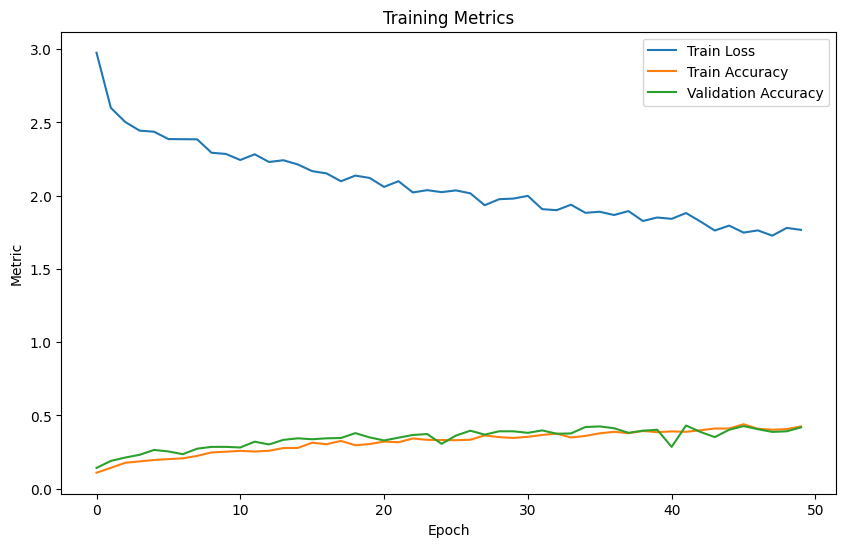

In [ ]:
# Definisci il modello ResNet
model = ResNet(ResidualBlock, [2, 2, 2, 2], num_classes=12,dropout_rate=0.2)  # ResNet-18 con 12 classi

# Hyperparametri
learning_rate = 0.001
num_epochs = 50
weight_decay = 1e-4

# Avvia il training
train_loss, train_acc, val_acc = train(
    net=model,
    train_iter=train_loader,
    val_iter=val_loader,
    num_epochs=num_epochs,
    lr=learning_rate,
    weight_decay=weight_decay
)
